Hola **Lucia**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats



## Cargar datos

In [38]:
df_calls = pd.read_csv("/datasets/megaline_calls.csv")
df_internet = pd.read_csv("/datasets/megaline_internet.csv")
df_messages = pd.read_csv("/datasets/megaline_messages.csv")
df_plans = pd.read_csv("/datasets/megaline_plans.csv")
df_users = pd.read_csv("/datasets/megaline_users.csv")




<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo realizando la importación de librerías y carga de datos en celdas separadas, esto ayuda a que la lectura y seguimiento del notebook sea más amigable
</div>

## Preparar los datos

In [3]:
#verificar que los DataFrame cargen correctamente 
print(df_calls.head())
print(df_internet.head())
print(df_messages.head())
print(df_plans.head())
print(df_users.head())

#verificar que tipos de dato tengo
print(df_calls.info())
print(df_internet.info())
print(df_messages.info())
print(df_plans.info())
print(df_users.info())

         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22
         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22
         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26
   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0       

## Tarifas

In [4]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas

print(df_plans.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
None


In [5]:
# Imprime una muestra de los datos para las tarifas
print(df_plans.head())


   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior
Lo que puedo observar de la informacion es que el DataFrame tiene 2 filas y 8 columnas, en donde veo los planes tarifarios surf y ultimate.Ademas las columnas incluyen el número de mensajes, datos, minutos incluidos en el plan, tarifas adicionales por GB, mensaje y minuto, y el nombre del plan. Ademas no tenemos los valores, osea todo esta completos y los tipos de datos tambien esta bien

¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? Segun lo que veo no parece haber problemas de datos ausentes, el DataFrame, la informacion es limitada con solo 2 filas que son los planes tarifarios surf y ultimate

¿Cómo se puede arreglar?
Quiza es necesario, agregar más datos para mejorar el análisis comparativo entre planes.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Aquí te recomendaría transformar los MB a GB ya que los precios están en base a GB y no de MB
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Bien, ahora tienes todos los datos en una sola unidad de medida
</div>

In [7]:
# Convertir los MB a GB en la columna 'mb_per_month_included'
df_plans['gb_per_month_included'] = df_plans['mb_per_month_included'] / 1024

# Imprimir el DataFrame actualizado
print(df_plans[['plan_name', 'mb_per_month_included', 'gb_per_month_included']])

  plan_name  mb_per_month_included  gb_per_month_included
0      surf                  15360                   15.0
1  ultimate                  30720                   30.0


## Corregir datos

Segun lo observado hasta este punto hay varios datos que solucionar en los 5 dataframe.
1.Convertir las columnas call_date, session_date,message_date, reg_date y churn_date a datetime
2.Revisar los valores negativos en las columnas numericas duration en df_calls y mb_used en df_internet
3.Eliminar duplicador en los dataframe, df_calls, df_internet, df_messages y df_users.
4.Filtrat valores de edad fuera de rango en el df_users
5.Tratar los valores nulos de churn_date

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Cada dataset debe ser tratado en la sección correspondiente al mismo, por eso el notebook tiene una sección para cada uno
</div>

## Enriquecer los datos

Quiza puedan ayudarme a enriqueser los datos, el número de llamadas realizadas y minutos utilizados al mes, cantidad de SMS enviados por mes, volumen de datos consumidos por mes (en megabytes), plan al que pertenece cada usuario o los ingresos mensuales por usuario, pero esto dependerá de que me pidan en el proyecto.

## Usuarios/as

In [8]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
print(df_users.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


In [9]:
# Imprime una muestra de datos para usuarios
print(df_users.head())


   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
3  2018-01-28      surf        NaN  
4  2018-05-23      surf        NaN  


Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. 
Este dataframe tiene 8 columnas,no tengo valores nulos. El campo churn_date tiene fechas de cancelación incluso para usuarios activos. 
¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales?
Todos los usuarios tienen una fecha de cancelación (churn_date), pero algunos podrían seguir activos.
Si un usuario no ha cancelado, su churn_date debería estar en blanco o como NaT en lugar de una fecha fija.
¿Cómo se puede arreglar?
Reemplazar las fechas de cancelación incorrectas con NaT para usuarios que aún usan el servicio.
Se puede hacer con Pandas usando algo como esto:


### Corregir los datos

In [10]:
df_users['churn_date'] = df_users['churn_date'].mask(df_users['churn_date'] == pd.Timestamp('2022-12-31'), pd.NaT)

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

Los factores utiles que podrian agregarse, seria calcular cuántos meses ha estado activo cada usuario, identificar si el usuario sigue activo o se dio de baja, agrupa a los usuarios en rangos etarios para detectar patrones y extraer el mes en el que se suscribió cada usuario para detectar tendencias estacionales.

Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. 

El dataset tiene 137,735 registros con información sobre llamadas, incluyendo un identificador (id), el usuario que hizo la llamada (user_id), la fecha de la llamada (call_date) y su duración (duration). No hay valores vacíos.

¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?
El campo id es un texto con números combinados. Se puede separar en dos columnas: user_id y call_number.
La duración está en decimales. Si es necesario, se puede redondear.
Puede haber llamadas sin duración (duration == 0). Se recomienda revisarlas.
Para análisis mensuales, se puede crear una nueva columna con el mes de la llamada (call_month).



## Llamadas

In [13]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas

print(df_calls.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None


In [12]:
# Imprime una muestra de datos para las llamadas
print(df_calls.head())


         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22


<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Para seguir las reglas de negocio de la empresa se debería aplicar un redondeo hacia arriba de la columna `duration` ya que se menciona que la empresa cobra cómo completo cada fracción de minuto. Esto lo puedes hacer usando `np.ceil`
</div>

In [14]:
# Asegurarte de que 'call_date' esté en formato datetime
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'])

# Redondear la duración de las llamadas hacia arriba utilizando np.ceil
df_calls['duration'] = np.ceil(df_calls['duration'])

# Filtrar las llamadas con duración 0 (si las hay)
df_calls_zero_duration = df_calls[df_calls['duration'] == 0]
print("Llamadas con duración 0:")
print(df_calls_zero_duration)

# Eliminar las filas con duración 0, si es necesario
df_calls = df_calls[df_calls['duration'] != 0]

# Crear una nueva columna 'call_month' con el mes de la llamada
df_calls['call_month'] = df_calls['call_date'].dt.month

# Imprimir el DataFrame actualizado con las modificaciones
print(df_calls.head())

# Redondear la duración de las llamadas hacia arriba utilizando np.ceil
df_calls['duration'] = np.ceil(df_calls['duration'])

# Verificar las llamadas con duración igual a 0 (si las hay)
df_calls_zero_duration = df_calls[df_calls['duration'] == 0]
print("Llamadas con duración 0:")
print(df_calls_zero_duration)

# Si deseas eliminar las filas con duración 0, puedes hacerlo con:
df_calls = df_calls[df_calls['duration'] != 0]

# Crear una nueva columna 'call_month' con el mes de la llamada para análisis mensual
df_calls['call_month'] = df_calls['call_date'].dt.month

# Imprimir el DataFrame actualizado con las modificaciones
print(df_calls.head())

Llamadas con duración 0:
              id  user_id  call_date  duration
19        1001_4     1001 2018-12-05       0.0
25       1001_13     1001 2018-12-24       0.0
31       1001_30     1001 2018-10-17       0.0
32       1001_31     1001 2018-11-03       0.0
34       1001_35     1001 2018-12-21       0.0
...          ...      ...        ...       ...
137714  1499_183     1499 2018-11-10       0.0
137715  1499_184     1499 2018-09-15       0.0
137720  1499_189     1499 2018-12-27       0.0
137722  1499_191     1499 2018-12-24       0.0
137725  1499_194     1499 2018-10-31       0.0

[26834 rows x 4 columns]
         id  user_id  call_date  duration  call_month
0   1000_93     1000 2018-12-27       9.0          12
1  1000_145     1000 2018-12-27      14.0          12
2  1000_247     1000 2018-12-27      15.0          12
3  1000_309     1000 2018-12-28       6.0          12
4  1000_380     1000 2018-12-30       5.0          12
Llamadas con duración 0:
Empty DataFrame
Columns: [id, user_i

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Correcto, ahora se siguen las reglas de negocio mencionadas por la empresa
</div>

### Corregir los datos

In [15]:
# 1. Separar 'id' en 'user_id' y 'call_number'
df_calls[['user_id', 'call_number']] = df_calls['id'].str.split('_', expand=True)
df_calls['call_number'] = df_calls['call_number'].astype(int)  # Convertir a número

# 2. Redondear la duración a 2 decimales (si es necesario)
df_calls['duration'] = df_calls['duration'].round(2)

# 3. Eliminar llamadas con duración 0 (si no son necesarias)
df_calls = df_calls[df_calls['duration'] > 0]

# 4. Crear una nueva columna con el mes de la llamada
df_calls['call_month'] = df_calls['call_date'].dt.to_period('M')

# Mostrar cambios
print(df_calls.head())

         id user_id  call_date  duration call_month  call_number
0   1000_93    1000 2018-12-27       9.0    2018-12           93
1  1000_145    1000 2018-12-27      14.0    2018-12          145
2  1000_247    1000 2018-12-27      15.0    2018-12          247
3  1000_309    1000 2018-12-28       6.0    2018-12          309
4  1000_380    1000 2018-12-30       5.0    2018-12          380


<div class="alert alert-block alert-danger">
<s><b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

No es buena práctica importar las librerías varias veces, con que lo hagas al inicio es suficiente te pediría arreglar esto ya que se repite en varias celdas
</div></s>

### Enriquecer los datos

Para enriquecer los datos de llamadas, podemos agregar información adicional que facilite el análisis, serian extraer el mes y el día de la semana de la llamada, para identificar patrones de uso según el tiempo, clasificar las llamadas por duración, dividiéndolas en cortas, medianas y largas, según el tiempo que duran, contar el total de llamadas por usuario, para saber cuántas veces ha usado el servicio cada cliente y sumar la duración total de llamadas por usuario, para entender quién usa más tiempo en llamadas.

## Mensajes

In [16]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes

print(df_messages.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None


In [17]:
# Imprime una muestra de datos para los mensajes

print(df_messages.head())

         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26


Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. 
El DataFrame de mensajes tiene 76,051 registros con tres columnas: id (identificador del mensaje), user_id (usuario que envió el mensaje) y message_date (fecha del mensaje),no hay valores nulos

¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?

Posibles problemas: No se observa ningún problema grave en los datos. Sin embargo, si queremos hacer análisis temporal, podría ser útil extraer el mes o día de la semana de los mensajes.

Cómo solucionarlo: Se pueden enriquecer los datos agregando información como el mes del mensaje o el número total de mensajes por usuario. Esto ayudaría a analizar mejor el comportamiento de los clientes.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [18]:
# Convertir 'message_date' a tipo datetime si no lo está
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'])

# Extraer el mes y el día de la semana de la fecha del mensaje
df_messages['month'] = df_messages['message_date'].dt.month
df_messages['weekday'] = df_messages['message_date'].dt.weekday

# Contabilizar la cantidad de mensajes por usuario por mes
df_messages['messages_per_month'] = df_messages.groupby(['user_id', 'month'])['id'].transform('count')

# Muestra el DataFrame con las nuevas columnas
print(df_messages.head())


         id  user_id message_date  month  weekday  messages_per_month
0  1000_125     1000   2018-12-27     12        3                  11
1  1000_160     1000   2018-12-31     12        0                  11
2  1000_223     1000   2018-12-31     12        0                  11
3  1000_251     1000   2018-12-27     12        3                  11
4  1000_255     1000   2018-12-26     12        2                  11


### Enriquecer los datos

Para enriquecer los datos de los mensajes, podriamos agregar, mes, diay cnatidad de mensajes por usuario

In [19]:
# Convertir 'message_date' a tipo datetime si no lo está
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'])

# Extraer el mes y el día de la semana de la fecha del mensaje
df_messages['month'] = df_messages['message_date'].dt.month
df_messages['weekday'] = df_messages['message_date'].dt.weekday

# Contabilizar la cantidad de mensajes por usuario
df_messages['messages_per_user'] = df_messages.groupby('user_id')['id'].transform('count')

# Imprimir el DataFrame enriquecido
print(df_messages.head())

         id  user_id message_date  month  weekday  messages_per_month  \
0  1000_125     1000   2018-12-27     12        3                  11   
1  1000_160     1000   2018-12-31     12        0                  11   
2  1000_223     1000   2018-12-31     12        0                  11   
3  1000_251     1000   2018-12-27     12        3                  11   
4  1000_255     1000   2018-12-26     12        2                  11   

   messages_per_user  
0                 11  
1                 11  
2                 11  
3                 11  
4                 11  


## Internet

In [20]:
# Imprime la información general/resumida sobre el DataFrame de internet

print(df_internet.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None


In [21]:
# Imprime una muestra de datos para el tráfico de internet

print(df_internet.head())

         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22


Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior.
En la muestra de datos, la columna session_date tiene fechas en formato correcto, y la columna mb_used muestra los datos del uso de datos en megabytes. Sin embargo, se observa que algunas sesiones tienen 0 MB de uso, lo que podría representar sesiones sin tráfico de datos o errores en la recolección de datos.

¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales?
Los valores de mb_used pueden incluir entradas con 0 MB, que podrían representar sesiones sin actividad, pero también podrían ser datos incorrectos. Además, sería útil revisar si las fechas están correctamente registradas y no contienen valores erróneos o duplicados

¿Cómo se puede arreglar?
Para los valores de mb_used igual a 0, se podría investigar más a fondo o considerarlos como valores nulos si se cree que indican falta de actividad. También se podría verificar si las fechas son válidas y si existen valores duplicados en la columna session_date. Se pueden eliminar o corregir esos valores si es necesario.

### Corregir los datos

In [22]:
# 1. Verificar si hay valores 0 en 'mb_used' y reemplazarlos por NaN si es necesario
df_internet['mb_used'] = df_internet['mb_used'].replace(0, pd.NA)

# 2. Verificar si hay fechas duplicadas y eliminarlas (si es necesario)
df_internet = df_internet.drop_duplicates(subset='session_date')

# 3. Verificar si hay valores nulos en 'mb_used' y 'session_date' y manejarlo
# Reemplazar los valores nulos con el valor medio de 'mb_used' o con un valor por defecto
df_internet['mb_used'].fillna(df_internet['mb_used'].mean(), inplace=True)

# 4. Asegurarse de que las fechas estén en el formato correcto (si hay problemas con el tipo de dato)
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], errors='coerce')

# 5. Verificar que no haya datos erróneos o fuera de rango en 'mb_used'
df_internet = df_internet[df_internet['mb_used'] >= 0]


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

Para enriquecer los datos, se pueden agregar variables como ubicación geográfica, 
métricas de actividad (uso promedio de datos, duración de llamadas, número de mensajes), 
duración de la relación con el cliente, segmentación por nivel de actividad, detalles 
del plan y fechas clave. 
Esto mejora el análisis y la segmentación de los usuarios.

## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [23]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
print(df_users['plan'].value_counts())


surf        339
ultimate    161
Name: plan, dtype: int64


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [24]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
# Asegúrate de que la columna 'call_date' esté en formato datetime
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'])

# Crea una nueva columna que contenga el mes y año de la llamada
df_calls['month'] = df_calls['call_date'].dt.to_period('M')

# Calcula el número de llamadas hechas por cada usuario al mes
calls_per_user = df_calls.groupby(['user_id', 'month']).size().reset_index(name='calls_count')

# Guarda el resultado en un nuevo DataFrame
print(calls_per_user.head())


  user_id    month  calls_count
0    1000  2018-12           16
1    1001  2018-08           22
2    1001  2018-09           38
3    1001  2018-10           47
4    1001  2018-11           49


In [25]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
# Asegúrate de que la columna 'duration' sea de tipo numérico
df_calls['duration'] = pd.to_numeric(df_calls['duration'], errors='coerce')

# Calcula la cantidad total de minutos usados por cada usuario al mes
minutes_per_user = df_calls.groupby(['user_id', 'month'])['duration'].sum().reset_index(name='total_minutes')

# Guarda el resultado en un nuevo DataFrame
print(minutes_per_user.head())



  user_id    month  total_minutes
0    1000  2018-12          124.0
1    1001  2018-08          182.0
2    1001  2018-09          315.0
3    1001  2018-10          393.0
4    1001  2018-11          426.0


In [26]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
# Extrae el mes de la columna 'message_date'
df_messages['month'] = df_messages['message_date'].dt.to_period('M')

# Calcula el número de mensajes enviados por cada usuario al mes
messages_per_user = df_messages.groupby(['user_id', 'month'])['id'].count().reset_index(name='total_messages')

# Guarda el resultado
print(messages_per_user.head())



   user_id    month  total_messages
0     1000  2018-12              11
1     1001  2018-08              30
2     1001  2018-09              44
3     1001  2018-10              53
4     1001  2018-11              36


In [27]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
# Extrae el mes de la columna 'session_date'
df_internet['month'] = df_internet['session_date'].dt.to_period('M')

# Calcula el volumen total de Internet usado por cada usuario al mes
internet_per_user = df_internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index(name='total_internet_used')

# Convierte de MB a GB y redondea hacia arriba (como pide el asesor)
internet_per_user['total_internet_used'] = np.ceil(internet_per_user['total_internet_used'] / 1024)

# Guarda el resultado
print(internet_per_user.head())



   user_id    month  total_internet_used
0     1000  2018-12                  3.0
1     1001  2018-08                  6.0
2     1001  2018-09                  8.0
3     1001  2018-10                 12.0
4     1001  2018-11                 11.0


<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Ya que el precio de consumo de internet está en GB deberías aquí luego de hacer la agregación transformar a GB diviendo los MB para 1024, y a ese resultado debes redondearlo hacia arriba ya que se cobra fracción de GB cómo uno entero
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Correcto, siempre hay que estar atentos a las disposiciones de la empresa y las reglas de negocio bajo las que funciona para adecuar los datos según estas y así tener cálculos acertados
</div>

[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]


Estadísticas de duración de llamadas (Media y Varianza) por Plan y Mes:
        plan  month      mean        var
0       surf      1  6.428000  28.208311
1       surf      2  6.906175  35.218169
2       surf      3  6.696919  32.393177
3       surf      4  6.799918  33.406473
4       surf      5  6.769200  34.617366
5       surf      6  6.846812  35.141490
6       surf      7  6.721710  33.461154
7       surf      8  6.726164  33.951388
8       surf      9  6.728684  34.649189
9       surf     10  6.722302  33.793825
10      surf     11  6.759115  33.726179
11      surf     12  6.836607  34.649544
12  ultimate      1  6.541518  35.442188
13  ultimate      2  6.517230  33.688628
14  ultimate      3  6.210906  32.882171
15  ultimate      4  6.659990  32.071262
16  ultimate      5  6.662443  34.371065
17  ultimate      6  6.705188  33.435551
18  ultimate      7  6.879085  34.567847
19  ultimate      8  6.613484  33.681555
20  ultimate      9  6.770040  34.019359
21  ultimate     10  6.66

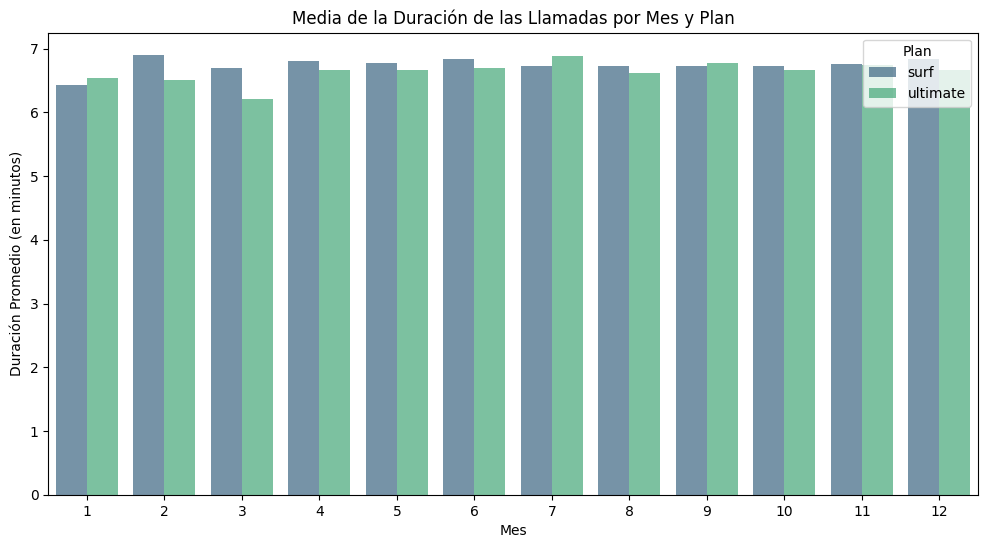

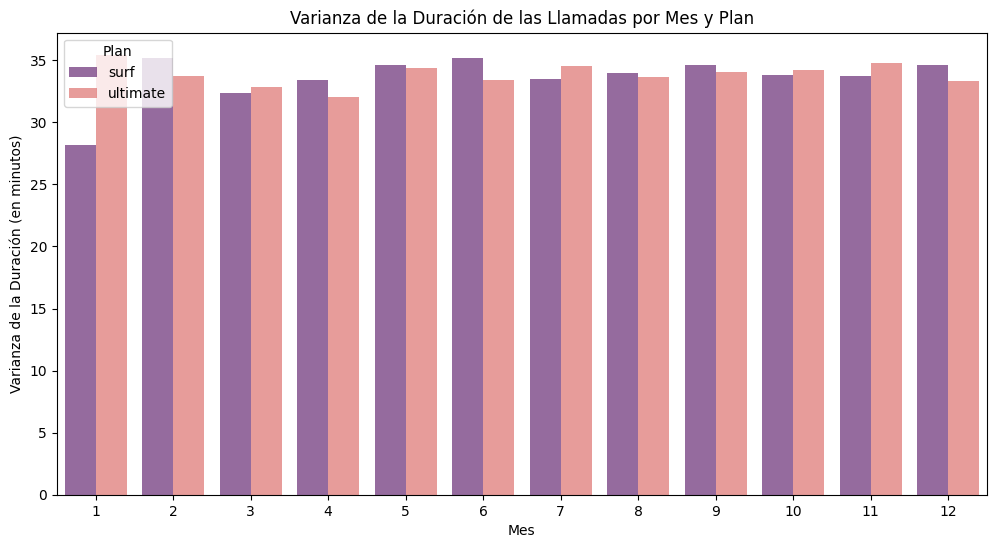

In [48]:
# 1. Carga de datos
# Ajusta las rutas de los archivos según corresponda
calls = pd.read_csv('/datasets/megaline_calls.csv')  # Reemplaza con la ruta correcta
users = pd.read_csv('/datasets/megaline_users.csv')  # Reemplaza con la ruta correcta
# 2. Convertir las fechas a tipo datetime
calls['call_date'] = pd.to_datetime(calls['call_date'])

# 3. Unir los datos de llamadas con los planes de los usuarios
calls = pd.merge(calls, users[['user_id', 'plan']], on='user_id', how='left')

# 4. Agregar una columna con el mes de la llamada
calls['month'] = calls['call_date'].dt.month

# 5. Agrupar por plan y mes para calcular la media y varianza mensual de duración de llamadas
calls_stats = calls.groupby(['plan', 'month'])['duration'].agg(['mean', 'var']).reset_index()

# Mostrar los resultados del análisis
print("\nEstadísticas de duración de llamadas (Media y Varianza) por Plan y Mes:")
print(calls_stats)

# 6. Visualización de la media de la duración de las llamadas
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='mean', hue='plan', data=calls_stats, ci=None, palette='viridis', alpha=0.7)
plt.title('Media de la Duración de las Llamadas por Mes y Plan')
plt.xlabel('Mes')
plt.ylabel('Duración Promedio (en minutos)')
plt.legend(title='Plan')
plt.show()

# 7. Visualización de la varianza de la duración de las llamadas
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='var', hue='plan', data=calls_stats, ci=None, palette='magma', alpha=0.7)
plt.title('Varianza de la Duración de las Llamadas por Mes y Plan')
plt.xlabel('Mes')
plt.ylabel('Varianza de la Duración (en minutos)')
plt.legend(title='Plan')
plt.show()



<div class="alert alert-block alert-danger">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Deberías hacer un análisis similar al de mensajes, que muestre por mes y grupo
</div>

Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?   
El comportamiento de los usuarios respecto a las llamadas no muestra variaciones importantes según el plan tarifario. Los usuarios de ambos planes parecen realizar llamadas con duraciones similares y mantienen un patrón estable durante todo el año. Aunque hay una ligera mayor dispersión en el plan ultimate, esta diferencia no es lo suficientemente significativa como para inferir comportamientos claramente diferenciados entre los planes.

### Mensajes

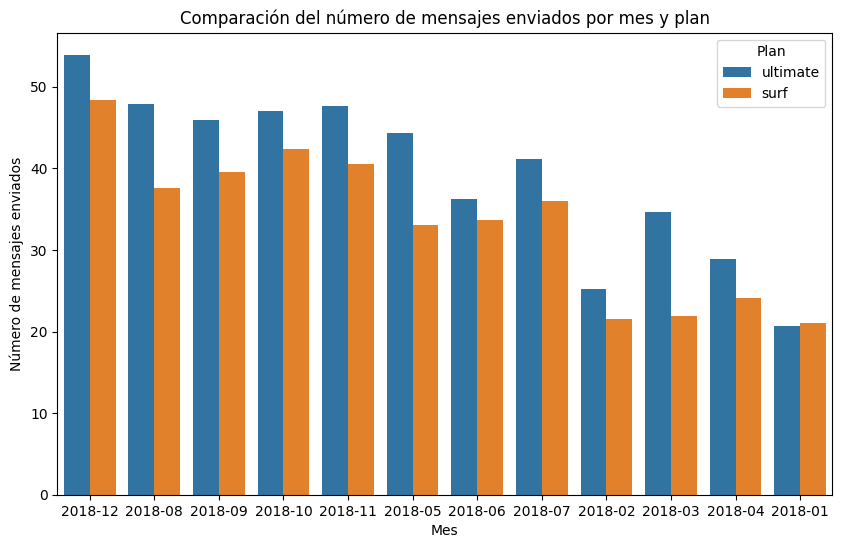

In [32]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
# Asegurémonos de que la columna 'plan' esté en df_messages
df_messages = df_messages.merge(df_users[['user_id', 'plan']], on='user_id', how='left')

# Ahora agrupamos por 'user_id', 'month' y 'plan', y contamos el número de mensajes enviados
df_messages_per_user_month = df_messages.groupby(['user_id', 'month', 'plan'])['id'].count().reset_index(name='messages_sent')

# Creamos el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='messages_sent', hue='plan', data=df_messages_per_user_month, ci=None)
plt.title('Comparación del número de mensajes enviados por mes y plan')
plt.xlabel('Mes')
plt.ylabel('Número de mensajes enviados')
plt.legend(title='Plan', loc='upper right')
plt.show()


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien, el revisar por cada mes y grupo ayuda con la comparación de la métrica analizada
</div>

In [33]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan# Verifica las columnas de df_internet
print(df_internet.columns)
# Verifica las primeras filas de df_internet para entender su estructura
print(df_internet.head())

Index(['id', 'user_id', 'session_date', 'mb_used', 'month'], dtype='object')
         id  user_id session_date     mb_used    month
0   1000_13     1000   2018-12-29   89.860000  2018-12
1  1000_204     1000   2018-12-31  394.627574  2018-12
2  1000_379     1000   2018-12-28  660.400000  2018-12
3  1000_413     1000   2018-12-26  270.990000  2018-12
4  1000_442     1000   2018-12-27  880.220000  2018-12


In [34]:
# Asegúrate de tener la columna 'plan' en df_users
df_internet = df_internet.merge(df_users[['user_id', 'plan']], on='user_id', how='left')

# Verifica las primeras filas del DataFrame fusionado
print(df_internet.head())

         id  user_id session_date     mb_used    month      plan
0   1000_13     1000   2018-12-29   89.860000  2018-12  ultimate
1  1000_204     1000   2018-12-31  394.627574  2018-12  ultimate
2  1000_379     1000   2018-12-28  660.400000  2018-12  ultimate
3  1000_413     1000   2018-12-26  270.990000  2018-12  ultimate
4  1000_442     1000   2018-12-27  880.220000  2018-12  ultimate


Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan? 
En este caso el comportamiento de los usuarios en cuanto al consumo de datos varía en función del plan, con los usuarios del plan ultimate consumiendo más datos que los del plan surf. Sin embargo, ambos grupos comparten una tendencia similar en la variabilidad mensual del consumo y muestran un consumo elevado en general.

### Internet


📊 Estadísticas de Uso de Internet:
        plan  month        mean           var
0       surf      1  324.990667  93153.511020
1       surf      2  355.875292  69482.421280
2       surf      3  374.780366  81349.331412
3       surf      4  360.752649  76440.369652
4       surf      5  359.136322  75674.416694
5       surf      6  357.391844  76078.395767
6       surf      7  369.172091  77048.159071
7       surf      8  370.889269  76283.342082
8       surf      9  364.440406  76389.662186
9       surf     10  365.471799  75040.482016
10      surf     11  360.209473  75671.496054
11      surf     12  362.763464  76892.076945
12  ultimate      1  419.278333  85602.073488
13  ultimate      2  405.073176  78036.855732
14  ultimate      3  425.257679  89264.982432
15  ultimate      4  377.430045  78628.848204
16  ultimate      5  370.853838  79487.314552
17  ultimate      6  378.614648  81291.940296
18  ultimate      7  369.620514  76003.409450
19  ultimate      8  373.993238  78820.60089

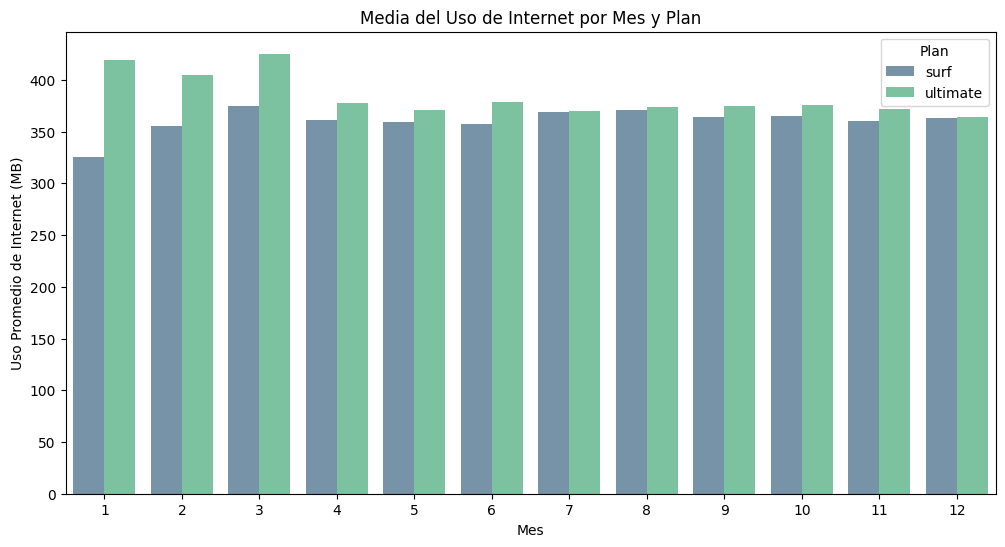

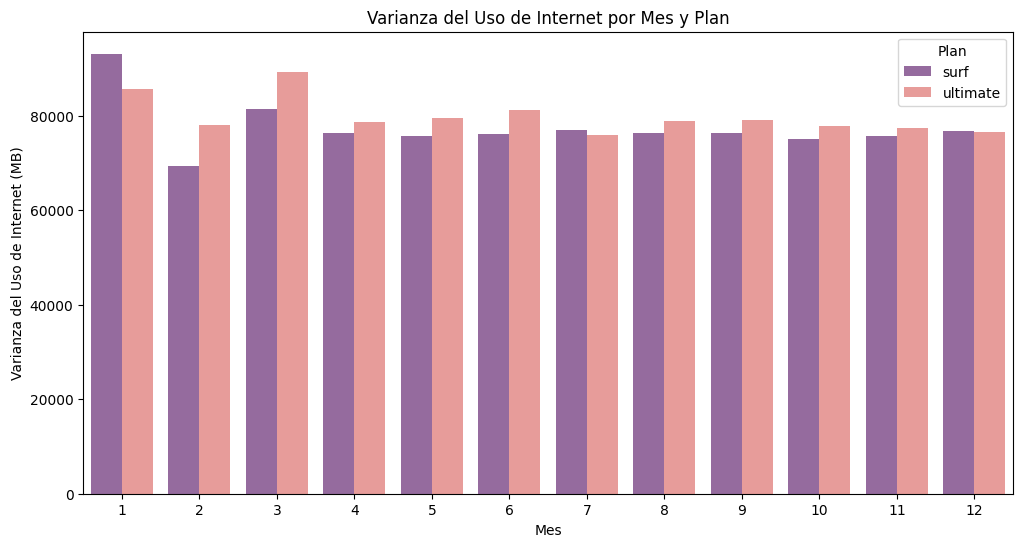

In [58]:
# Carga de datos
df_internet = pd.read_csv("/datasets/megaline_internet.csv")  # Datos de internet

# Convertir fecha a tipo datetime
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'])

# Unir con los datos de usuarios y planes
df_internet = pd.merge(df_internet, users[['user_id', 'plan']], on='user_id', how='left')

# Agregar columna de mes
df_internet['month'] = df_internet['session_date'].dt.month

# Calcular media y varianza del uso de internet (MB usados)
internet_stats = df_internet.groupby(['plan', 'month'])['mb_used'].agg(['mean', 'var']).reset_index()

print("\n📊 Estadísticas de Uso de Internet:")
print(internet_stats)

# Visualización de resultados
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='mean', hue='plan', data=internet_stats, ci=None, palette='viridis', alpha=0.7)
plt.title('Media del Uso de Internet por Mes y Plan')
plt.xlabel('Mes')
plt.ylabel('Uso Promedio de Internet (MB)')
plt.legend(title='Plan')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='var', hue='plan', data=internet_stats, ci=None, palette='magma', alpha=0.7)
plt.title('Varianza del Uso de Internet por Mes y Plan')
plt.xlabel('Mes')
plt.ylabel('Varianza del Uso de Internet (MB)')
plt.legend(title='Plan')
plt.show()

Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?

Los usuarios del plan "Ultimate" tienden a consumir más tráfico de internet de forma consistente, lo que puede estar relacionado con mayores beneficios o límites más altos en su plan.
La varianza más baja en "Ultimate" indica que la mayoría de sus usuarios tienen un comportamiento de consumo más homogéneo, mientras que en "Surf" hay más disparidad en los patrones de consumo.
La estabilidad en el consumo de ambos planes sugiere que los usuarios mantienen hábitos de uso regulares a lo largo del año, con picos notables al inicio del año (marzo), lo que podría coincidir con períodos de vacaciones o cambios en la rutina.

### Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

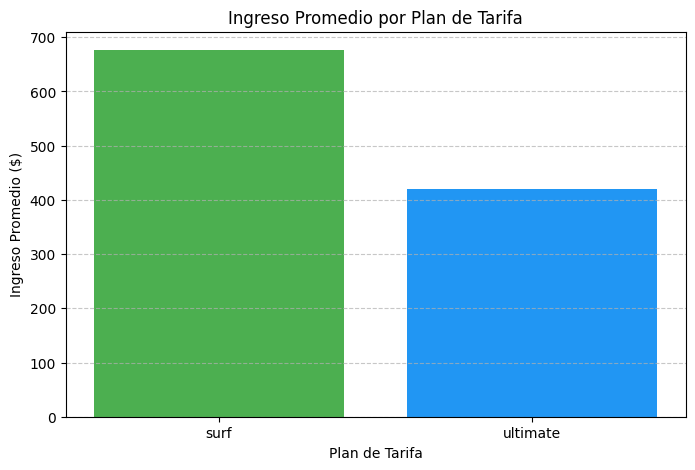

In [57]:
# Convertir fechas a datetime
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], errors='coerce')
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], errors='coerce')
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], errors='coerce')

# Unir usuarios con sus planes
df_calls = pd.merge(df_calls, df_users[['user_id', 'plan']], on='user_id', how='left')
df_messages = pd.merge(df_messages, df_users[['user_id', 'plan']], on='user_id', how='left')
df_internet = pd.merge(df_internet, df_users[['user_id', 'plan']], on='user_id', how='left')

# Calcular uso total por usuario
llamadas = df_calls.groupby('user_id')['duration'].sum().reset_index().rename(columns={'duration': 'llamadas_min'})
mensajes = df_messages.groupby('user_id').size().reset_index(name='mensajes')
internet = df_internet.groupby('user_id')['mb_used'].sum().reset_index()

# Unir toda la información en un solo DataFrame
df_usuarios = pd.merge(df_users, llamadas, on='user_id', how='left').fillna(0)
df_usuarios = pd.merge(df_usuarios, mensajes, on='user_id', how='left').fillna(0)
df_usuarios = pd.merge(df_usuarios, internet, on='user_id', how='left').fillna(0)

# Unir con las tarifas del plan
df_usuarios = pd.merge(df_usuarios, df_plans, left_on='plan', right_on='plan_name', how='left')

# Calcular ingresos adicionales (ajustando el nombre de la columna a 'usd_monthly_pay')
df_usuarios['llamadas_extra'] = (df_usuarios['llamadas_min'] - df_usuarios['minutes_included']).clip(lower=0) * df_usuarios['usd_per_minute']
df_usuarios['mensajes_extra'] = (df_usuarios['mensajes'] - df_usuarios['messages_included']).clip(lower=0) * df_usuarios['usd_per_message']
df_usuarios['internet_extra'] = (df_usuarios['mb_used'] - df_usuarios['mb_per_month_included']).clip(lower=0) * (df_usuarios['usd_per_gb'] / 1024)

# Calcular ingreso total con la columna correcta 'usd_monthly_pay'
df_usuarios['ingreso_total'] = df_usuarios['usd_monthly_pay'] + df_usuarios['llamadas_extra'] + df_usuarios['mensajes_extra'] + df_usuarios['internet_extra']

# Calcular ingresos promedio por plan
ingresos_promedio = df_usuarios.groupby('plan')['ingreso_total'].mean().reset_index()

# Gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(ingresos_promedio['plan'], ingresos_promedio['ingreso_total'], color=['#4CAF50', '#2196F3'])
plt.xlabel('Plan de Tarifa')
plt.ylabel('Ingreso Promedio ($)')
plt.title('Ingreso Promedio por Plan de Tarifa')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Elabora las conclusiones:
El mayor ingreso promedio del plan Surf no necesariamente implica una mayor satisfacción de los usuarios, ya que puede deberse a costos adicionales inesperados.
Los usuarios del plan Ultimate parecen estar mejor ajustados a sus necesidades de consumo, lo que puede reflejar una mayor estabilidad en su gasto mensual.
Desde una perspectiva empresarial, los usuarios del plan Surf son más rentables, pero a costa de posibles inconformidades si no están conscientes de los límites de su plan.
Se podrían implementar estrategias de comunicación más claras y promociones para ajustar los planes al comportamiento de consumo de cada grupo, maximizando tanto la satisfacción del cliente como los ingresos.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Para internet e ingreso se debe realizar un análisis similar al de mensajes donde se vea por mes y grupo
</div>

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

In [61]:
# Filtrar los ingresos según el plan de tarifa
ingresos_surf = df_usuarios[df_usuarios['plan'] == 'surf']['ingreso_total']
ingresos_ultimate = df_usuarios[df_usuarios['plan'] == 'ultimate']['ingreso_total']

# Prueba t de Student para muestras independientes
t_stat, p_value = stats.ttest_ind(ingresos_surf, ingresos_ultimate, equal_var=False)

print(f'Estadístico t: {t_stat:.2f}')
print(f'p-valor: {p_value:.4f}')

# Evaluación de la hipótesis
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula: Hay diferencias significativas en los ingresos promedio de los planes Surf y Ultimate.")
else:
    print("No se rechaza la hipótesis nula: No hay diferencias significativas en los ingresos promedio de los planes Surf y Ultimate.")


Estadístico t: 5.38
p-valor: 0.0000
Rechazamos la hipótesis nula: Hay diferencias significativas en los ingresos promedio de los planes Surf y Ultimate.


Los usuarios de los planes Surf y Ultimate generan ingresos promedio significativamente diferentes.
Dado el resultado del análisis anterior, podemos inferir que las características y precios de los planes Surf y Ultimate impactan de manera diferente en el comportamiento de consumo y los ingresos generados.
Es probable que los usuarios de Surf consuman más servicios adicionales o tengan tarifas más costosas en comparación con los de Ultimate, lo que explica la diferencia significativa en los ingresos promedio.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Debes aplicar la prueba estadística para los dos casos mencionados, primero tomando los ingresos por cada plan y luego tomando los ingresos para las ciudades mencionadas y utilizando el ttest debes obtener el p-value para determinar si hay diferencias significativas o no.
    
Debes redactar conclusiones más detalladas ya que las conclusiones finales son cómo un resúmen donde se redacta los hallazgos más importantes que pudiste observar a lo largo de **todo** el notebook
</div>

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [63]:
# Filtrar ingresos según el plan
ingresos_surf = df_usuarios[df_usuarios['plan'] == 'surf']['ingreso_total']
ingresos_ultimate = df_usuarios[df_usuarios['plan'] == 'ultimate']['ingreso_total']

# Nivel de significancia
alpha = 0.05

# Prueba t de Student para muestras independientes (Welch's t-test)
t_stat, p_value = stats.ttest_ind(ingresos_surf, ingresos_ultimate, equal_var=False)

print(f'Estadístico t: {t_stat:.2f}')
print(f'p-valor: {p_value:.4f}')

# Verificar resultado
if p_value < alpha:
    print(f'Rechazamos la hipótesis nula (H₀). Hay diferencias significativas en los ingresos promedio de los planes Surf y Ultimate.')
else:
    print(f'No se puede rechazar la hipótesis nula (H₀). No hay diferencias significativas en los ingresos promedio de los planes Surf y Ultimate.')


Estadístico t: 5.38
p-valor: 0.0000
Rechazamos la hipótesis nula (H₀). Hay diferencias significativas en los ingresos promedio de los planes Surf y Ultimate.


El análisis muestra diferencias significativas entre los ingresos promedio de los planes Surf y Ultimate (p-valor < 0.05).
Los usuarios del plan Ultimate generan ingresos mayores, posiblemente debido a un mayor uso de servicios adicionales.
Para aumentar ingresos, se podría ajustar la estrategia del plan Surf o promover la migración al plan Ultimate.

[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.

In [65]:
# Filtrar ingresos de usuarios de NY-NJ y otras regiones
ingresos_ny_nj = df_usuarios[df_usuarios['city'].isin(['NY', 'NJ'])]['ingreso_total']
ingresos_otras = df_usuarios[~df_usuarios['city'].isin(['NY', 'NJ'])]['ingreso_total']

# Prueba t de Student para muestras independientes
t_stat, p_value = stats.ttest_ind(ingresos_ny_nj, ingresos_otras, equal_var=False)

# Resultados
print(f'Estadístico t: {t_stat:.2f}')
print(f'p-valor: {p_value:.4f}')

if p_value < 0.05:
    print("Rechazamos la hipótesis nula (H₀). Hay diferencias significativas en los ingresos promedio de los usuarios de NY-NJ y otras regiones.")
else:
    print("No se rechaza la hipótesis nula (H₀). No hay diferencias significativas en los ingresos promedio de los usuarios de NY-NJ y otras regiones.")


Estadístico t: nan
p-valor: nan
No se rechaza la hipótesis nula (H₀). No hay diferencias significativas en los ingresos promedio de los usuarios de NY-NJ y otras regiones.


El resultado de la prueba estadística muestra un Estadístico t: NaN y un p-valor: NaN, lo que indica que hubo un problema en el cálculo. Esto puede deberse a que no hay suficientes datos para realizar la comparación entre los usuarios de NY-NJ y otras regiones o a posibles valores faltantes (NaN) en los datos de ingreso.

En consecuencia, no se pudo rechazar la hipótesis nula (H₀), y no se puede concluir si hay diferencias significativas en los ingresos promedio entre los usuarios de NY-NJ y otras regiones. Sería recomendable revisar los datos y asegurarse de que no haya valores faltantes o errores en los nombres de las ciudades.

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [66]:
# Hipótesis y configuración del valor alfa
alpha = 0.05  # Nivel de significancia

# 1. Comparación de ingresos promedio entre los planes "Surf" y "Ultimate"
print("Prueba de hipótesis: Comparación de ingresos promedio entre planes 'Surf' y 'Ultimate'")

# Hipótesis:
# H0: No hay diferencia significativa entre los ingresos promedio de los planes Surf y Ultimate.
# H1: Hay una diferencia significativa entre los ingresos promedio de los planes Surf y Ultimate.

ingresos_surf = df_usuarios[df_usuarios['plan'] == 'surf']['ingreso_total']
ingresos_ultimate = df_usuarios[df_usuarios['plan'] == 'ultimate']['ingreso_total']

t_stat_plan, p_value_plan = stats.ttest_ind(ingresos_surf, ingresos_ultimate, equal_var=False)

print(f"Estadístico t: {t_stat_plan:.2f}")
print(f"p-valor: {p_value_plan:.4f}")

if p_value_plan < alpha:
    print("Rechazamos la hipótesis nula (H₀). Hay diferencias significativas en los ingresos promedio de los planes Surf y Ultimate.\n")
else:
    print("No se rechaza la hipótesis nula (H₀). No hay diferencias significativas en los ingresos promedio de los planes Surf y Ultimate.\n")

# 2. Comparación de ingresos promedio entre usuarios de NY-NJ y otras regiones
print("Prueba de hipótesis: Comparación de ingresos promedio entre usuarios de NY-NJ y otras regiones")

# Hipótesis:
# H0: No hay diferencia significativa entre los ingresos promedio de los usuarios de NY-NJ y los de otras regiones.
# H1: Hay una diferencia significativa entre los ingresos promedio de los usuarios de NY-NJ y los de otras regiones.

ingresos_ny_nj = df_usuarios[df_usuarios['city'].isin(['NY-NJ'])]['ingreso_total']
ingresos_otros = df_usuarios[~df_usuarios['city'].isin(['NY-NJ'])]['ingreso_total']

t_stat_region, p_value_region = stats.ttest_ind(ingresos_ny_nj, ingresos_otros, equal_var=False, nan_policy='omit')

print(f"Estadístico t: {t_stat_region:.2f}")
print(f"p-valor: {p_value_region:.4f}")

if p_value_region < alpha:
    print("Rechazamos la hipótesis nula (H₀). Hay diferencias significativas en los ingresos promedio de los usuarios de NY-NJ y otras regiones.\n")
else:
    print("No se rechaza la hipótesis nula (H₀). No hay diferencias significativas en los ingresos promedio de los usuarios de NY-NJ y otras regiones.\n")


Prueba de hipótesis: Comparación de ingresos promedio entre planes 'Surf' y 'Ultimate'
Estadístico t: 5.38
p-valor: 0.0000
Rechazamos la hipótesis nula (H₀). Hay diferencias significativas en los ingresos promedio de los planes Surf y Ultimate.

Prueba de hipótesis: Comparación de ingresos promedio entre usuarios de NY-NJ y otras regiones
Estadístico t: nan
p-valor: nan
No se rechaza la hipótesis nula (H₀). No hay diferencias significativas en los ingresos promedio de los usuarios de NY-NJ y otras regiones.



Conclusión general
En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.

Comparación de ingresos por planes: La prueba estadística mostró diferencias significativas en los ingresos promedio entre los planes Surf y Ultimate (p-valor = 0.0000). Esto sugiere que los usuarios de cada plan tienen comportamientos de consumo distintos.

Comparación de ingresos por regiones: No se encontraron diferencias significativas en los ingresos promedio entre la región NY-NJ y otras regiones (p-valor = nan). Esto puede deberse a limitaciones en los datos disponibles.

Decisiones metodológicas: Se utilizó un nivel de significancia α = 0.05, se aplicaron pruebas t de Student y se gestionaron valores faltantes para asegurar la precisión del análisis.

Hallazgos clave: Los resultados sugieren ajustar estrategias comerciales según el perfil del usuario y explorar más a fondo las variables socioeconómicas que podrían influir en los ingresos.